## Importing libraries

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Device agnostic code.

In [ ]:
# Setup device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using deivice: {device}")

Using deivice: cuda


## Creating dataset.

In [ ]:
# Creating dataset using Linear Regression Formula.
weight = 0.8
bias = 0.2

# Creating dataset in a range.
start = 0
end = 1
step = 0.02

# Create X and y(features.)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640],
         [0.2800],
         [0.2960],
         [0.3120],
         [0.3280],
         [0.3440]]))

## Split data.

In [ ]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
## Vizualize the dataset.

In [ ]:
def plot_predictions( train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions = None):
  plt.figure(figsize = (10,7))

  # Plot training data in blue.
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot testing data in green.
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there any predictions.
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show legend.
  plt.legend(prop={"size":14})


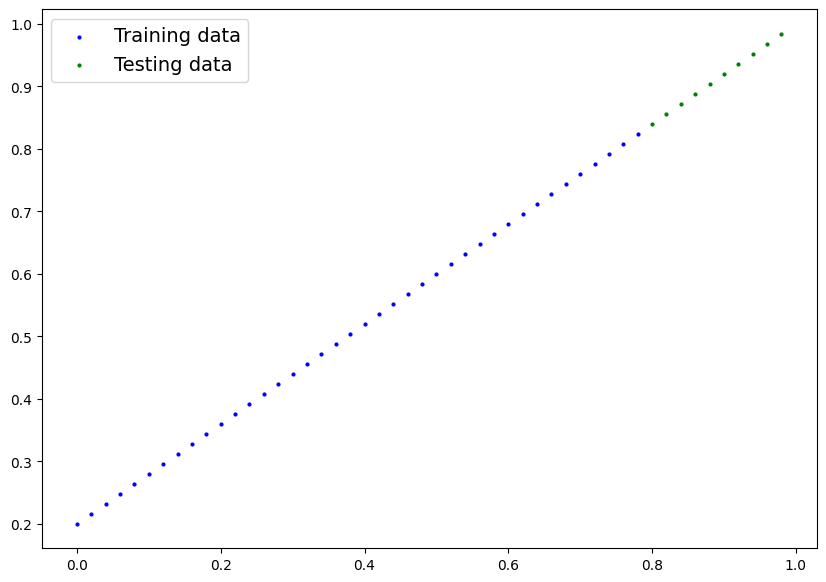

In [ ]:
plot_predictions()

## Creating Linear Regression Model.

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features=1)

    # self.weight = nn.Parameter(torch.randn(1,
    #                                        requires_grad=True,
    #                                        dtype=torch.float))
    # self.bias = nn.Parameter(torch.randn(1,
    #                                        requires_grad=True,
    #                                        dtype=torch.float))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
# Create random seed
torch.manual_seed(42)

model_0 = LinearRegressionModelV2()

list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## Making predictions using `torch.inference_model()`

In [ ]:
len(X_test)

10

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

len(y_preds)

10

In [ ]:
len(y_test)

10

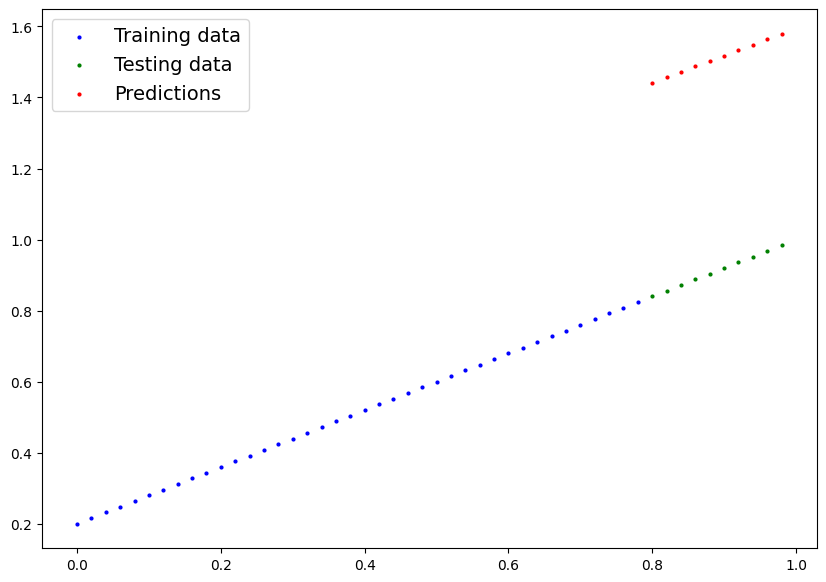

In [ ]:
plot_predictions(predictions=y_preds)

## Training the model.

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
# Setting up loss function.
loss_fn = nn.L1Loss()

# Setting up optimizer.
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

## Building Training loop.

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data.
epochs = 200

#Keeping track of model progress.
epoch_count = []
loss_values = []
test_loss_values = []

### Training.
#Loop through the data.
for epoch in range(epochs):
  # Set the model to training mode.
  model_0.train() # Turns on all gradient tracking.

  # Forward pass.
  y_pred = model_0(X_train)

  # Calculate the loss.
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # Optimizer zero grad.
  optimizer.zero_grad()

  # Perform back propagation on the loss with respect to the parameters of the model.
  loss.backward()

  # Step the optimizer.
  optimizer.step()

  ### Testing
  model_0.eval() #turns off different settings in the model.
  with torch.inference_mode():
    #1.Do forward pass.
    test_pred = model_0(X_test)

    #2.Calculate the loss.
    test_loss = loss_fn(test_pred, y_test)

  if epoch%10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss_values)
    test_loss_values.append(test_loss_values)

    print(f"Epoch: {epoch} | Test loss: {test_loss}")
    #Print model.
    print(model_0.state_dict())

Loss: 0.6161779165267944
Epoch: 0 | Test loss: 0.584976315498352
OrderedDict([('linear_layer.weight', tensor([[0.7606]])), ('linear_layer.bias', tensor([0.8200]))])
Loss: 0.6046569347381592
Loss: 0.5931359529495239
Loss: 0.5816149711608887
Loss: 0.5700939893722534
Loss: 0.5585730075836182
Loss: 0.5470520257949829
Loss: 0.5355310440063477
Loss: 0.5240100026130676
Loss: 0.5124890208244324
Loss: 0.5009680986404419
Epoch: 10 | Test loss: 0.45026636123657227
OrderedDict([('linear_layer.weight', tensor([[0.7216]])), ('linear_layer.bias', tensor([0.7200]))])
Loss: 0.48944711685180664
Loss: 0.47792601585388184
Loss: 0.46640509366989136
Loss: 0.4548841118812561
Loss: 0.44336310029029846
Loss: 0.4318421483039856
Loss: 0.42032113671302795
Loss: 0.4088001847267151
Loss: 0.39727917313575745
Loss: 0.3857582211494446
Epoch: 20 | Test loss: 0.3155565857887268
OrderedDict([('linear_layer.weight', tensor([[0.6826]])), ('linear_layer.bias', tensor([0.6200]))])
Loss: 0.37423717975616455
Loss: 0.3627161979

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]])),
             ('linear_layer.bias', tensor([0.2095]))])

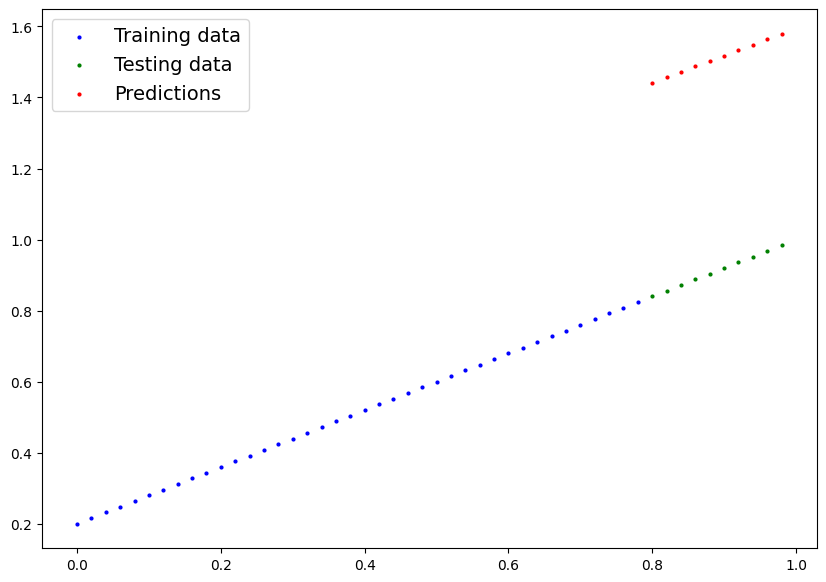

In [ ]:
plot_predictions(predictions = y_preds)

## Save the model.

In [ ]:
# Saving model
from pathlib import Path

#1.Create model directory.
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path.
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#3. Save the model state dict.
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


## Load the PyTorch Model.

In [ ]:
# Create a new instance of the model.
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model 1 state dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model to device.
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Check parameters.
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

## Evaluate loaded model.

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)